In [1]:
import numpy as np
from TDD2.TDD import Ini_TDD,Clear_TDD,set_index_order,get_tdd
from TDD2.TDD_Q import cir_2_tn,get_real_qubit_num,add_trace_line,add_inputs,add_outputs
from TDD2.TDD_Q import reshape as reshape2
from TDD2.TN import Index,Tensor,TensorNetwork
import time
import random
from qiskit import QuantumCircuit
from sympy import *
from sympy.parsing.sympy_parser import parse_expr
from TDD2.TDD import get_unique_table_num as gu1
from TDD2.BMD2 import get_unique_table_num as gu2
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\qiskit\__init__.py:64: RuntimeWarning: Could not import the Aer provider from the qiskit-aer package. Install qiskit-aer or check your installation.
  RuntimeWarning)


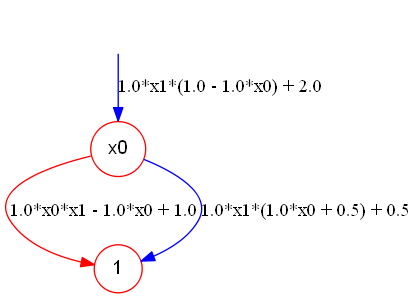

In [2]:
Ini_TDD(['q0','x0','y0','x1','y1'])
A=['x0','y0','x1','y1','xn0','xn1']
[x0,y0,x1,y1,xn0,xn1]=symbols(A)
U=np.array([2*xn0*xn1+3*xn0*x1+2*x0*x1,xn0*xn1+3*xn0*x1+x0*xn1+4*x0*x1])
var=[Index('x0')]
ts1=Tensor(U,var)
tdd=ts1.tdd()
tdd.show()
# ts2=Tensor(U,var)

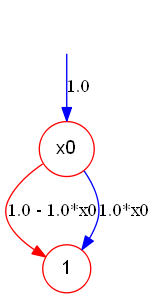

In [3]:
Ini_TDD(['q0','x0','y0','x1','y1'])
A=['x0','y0','x1','y1','xn0','xn1']
[x0,y0,x1,y1,xn0,xn1]=symbols(A)
U=np.array([xn0,x0])
var=[Index('x0')]
ts1=Tensor(U,var)
tdd=ts1.tdd()
tdd.show()
# ts2=Tensor(U,var)

In [4]:
# print(type(tdd.weight))
# # tdd.weight.show()
# tdd.node.out_weight[1].show()

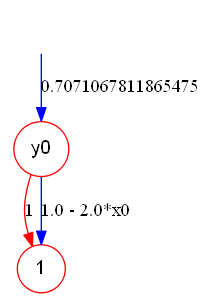

In [5]:
H=1/np.sqrt(2)*np.array([[1,1],[1,-1]])
var2=[Index('x0'),Index('y0')]
ts2=Tensor(H,var2)
# ts2.tdd().show()
tn=TensorNetwork([ts1,ts2])
tdd=tn.cont()
# tdd.weight=[1/np.sqrt(2)]
tdd.show()
# Clear_TDD()

0.14005064964294434
4
37
17


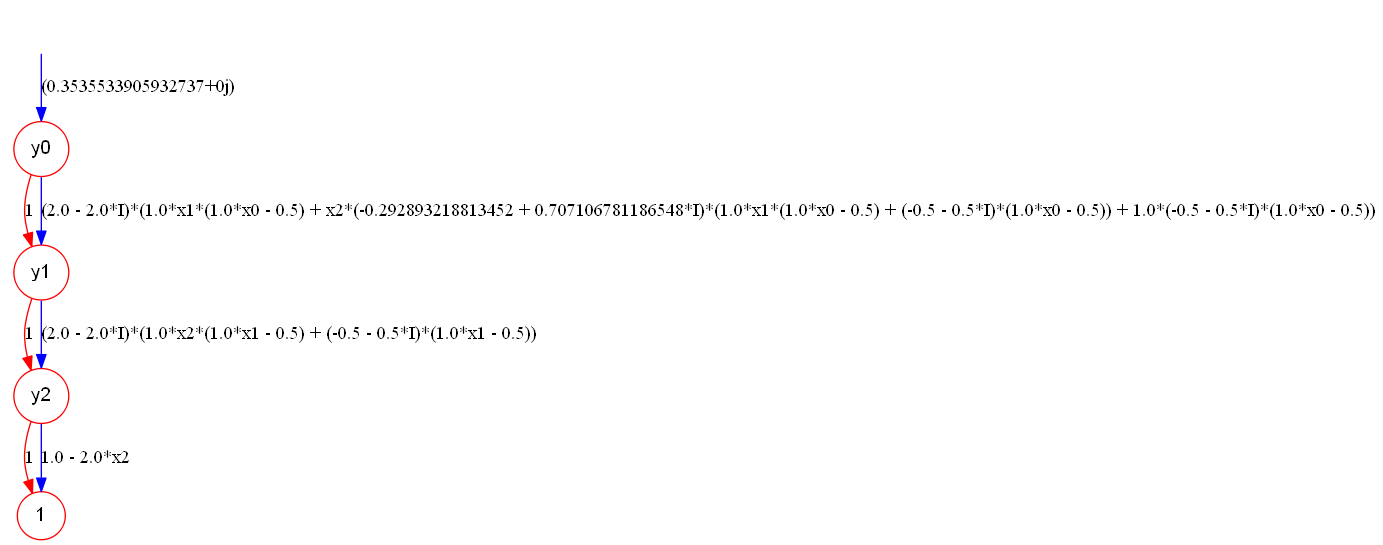

In [6]:
path='Benchmarks/'
n=3
t_start=time.time()
file_name='qft_'+str(n)+'.qasm'
cir=QuantumCircuit.from_qasm_file(path+file_name)
tn,indices=cir_2_tn(cir)
for k in range(n):
    x_k='x'+str(k)
    xn_k='xn'+str(k)
    s=Symbol(x_k)
    ns=Symbol(xn_k)
    U=np.array([ns,s])
#     U=np.array([0,1])
    temp_ts=Tensor(U,[Index(x_k)])
    tn.tensors.insert(0,temp_ts)
    if not x_k in indices:
        indices.append(x_k)
Ini_TDD(indices,n=300)
tdd=tn.cont()
print(time.time()-t_start)
print(tdd.node_number())
print(gu1())
print(gu2())
tdd.show()

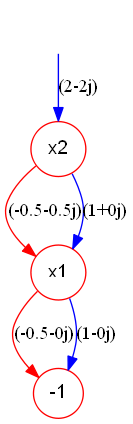

In [7]:
bdd=tdd.node.successor[1].out_weight[1]
# print(bdd.node.out_weight[1])
# print(type(bdd.node.out_weight[1]))
bdd.show()

(-0.2928932188134524+0.7071067811865476j)
<class 'complex'>


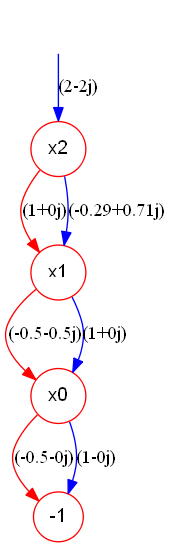

In [8]:
bdd=tdd.node.out_weight[1]
print(bdd.node.out_weight[1])
print(type(bdd.node.out_weight[1]))
bdd.show()

In [9]:
# path='Benchmarks/'
# x=[]
# y=[]
# z=[]
# for n in range(2,31,1):
#     t1=time.time()
#     file_name='qft_'+str(n)+'.qasm'
#     cir=QuantumCircuit.from_qasm_file(path+file_name)
#     tn,indices=cir_2_tn(cir)
#     for k in range(n):
#         x_k='x'+str(k)
#         xn_k='xn'+str(k)
#         s=Symbol(x_k)
#         ns=Symbol(xn_k)
#         U=np.array([ns,s])
#     #     U=np.array([1,0])
#         temp_ts=Tensor(U,[Index(x_k)])
#         tn.tensors.insert(0,temp_ts)
#     Ini_TDD(indices)
#     tdd=tn.cont()
#     t=time.time()-t1
#     print(n,t)
#     print(gu1())
#     print(gu2())
#     x.append(n)
#     y.append(t)
#     z.append(gu1()+gu2())

In [10]:
# # y=[log(k) for k in y]
# plt.plot(x,y)
# k=[t**1.6/100 for t in x]
# plt.plot(x,k,'*',label='n^1.6/100')
# plt.xlabel("Qubits num")
# plt.ylabel("Time(s)")
# plt.legend()

In [11]:
# # z=[log(k) for k in z]
# plt.plot(x,z)
# k=[t**2.1*10 for t in x]
# plt.plot(x,k,'*',label='n^2.1*10')
# plt.xlabel("Qubits num")
# plt.ylabel("Total number of nodes")
# plt.legend()

10


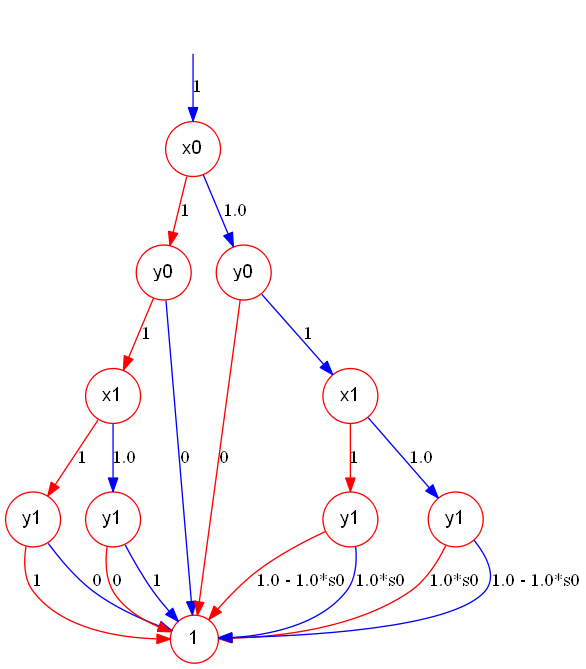

In [12]:
Ini_TDD(['x0','y0','x1','y1'],['s0'])
x=symbols('s0')
nx=symbols('sn0')
U=np.array([[1,0,0,0],[0,1,0,0],[0,0,nx,x],[0,0,x,nx]])
# U=np.array([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]])
U=reshape2(U)
# print(U)
var=[Index('x0'),Index('y0'),Index('x1'),Index('y1')]
ts1=Tensor(U,var)
tdd=ts1.tdd()
print(tdd.node_number())
tdd.show()

51
10


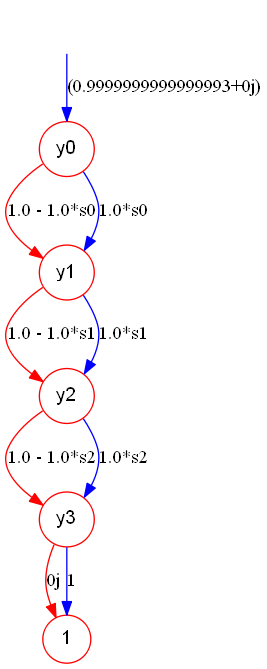

In [13]:
def veri_bv(n):

    syms=[]
    syms2=[]
    for k in range(n):
        syms.append(symbols('s'+str(k)))
        syms.append(symbols('sn'+str(k)))
        syms2.append('s'+str(k))
    tn=TensorNetwork([])
    U=np.array([1,0])
    for k in range(n):
        var=[Index('x'+str(k))]
        ts=Tensor(U,var)
        tn.tensors.append(ts)
        
    U=np.array([0,1])
    var=[Index('x'+str(n))]
    ts=Tensor(U,var)
    tn.tensors.append(ts)
    
    H=1/np.sqrt(2)*np.array([[1,1],[1,-1]])
    for k in range(n+1):
        var=[Index('x'+str(k)),Index('x'+str(k)+'_1')]
        ts=Tensor(H,var)
        tn.tensors.append(ts)
    
    for k in range(n):
        U=np.array([[1,0,0,0],[0,1,0,0],[0,0,syms[2*k+1],syms[2*k]],[0,0,syms[2*k],syms[2*k+1]]])
        U=reshape2(U)
        var=[Index('x'+str(k)+'_1'),Index('x'+str(k)+'_2'),Index('x'+str(n)+'_'+str(k+1)),Index('x'+str(n)+'_'+str(k+2))]
        ts=Tensor(U,var)
        tn.tensors.append(ts)
    for k in range(n):
        var=[Index('x'+str(k)+'_2'),Index('y'+str(k))]
        ts=Tensor(H,var)
        tn.tensors.append(ts)

    var=[Index('x'+str(n)+'_'+str(n+1)),Index('y'+str(n))]
    ts=Tensor(H,var)
    tn.tensors.append(ts)
    
    var=[]
    for k in range(n):
        var.append('x'+str(k))
        var.append('x'+str(k)+'_1')
        var.append('x'+str(k)+'_2')
        var.append('y'+str(k))
    var.append('x'+str(n))
    
    for k in range(n+1):
        var.append('x'+str(n)+'_'+str(k+1))
    var.append('y'+str(n))
    syms2.reverse()
#     print(syms2)
    Ini_TDD(var,syms2)
    
    tdd=tn.cont()
    print(gu1())
    print(gu2())
    return tdd

tdd=veri_bv(3)
tdd.show()

In [14]:
def toffoli(n):
    """The matrix of C^n(X)"""
    T=np.eye(2**(n+1))
    T[2**(n+1)-2,2**(n+1)-2]=0
    T[2**(n+1)-1,2**(n+1)-1]=0
    T[2**(n+1)-2,2**(n+1)-1]=1
    T[2**(n+1)-1,2**(n+1)-2]=1
    return T

60
16


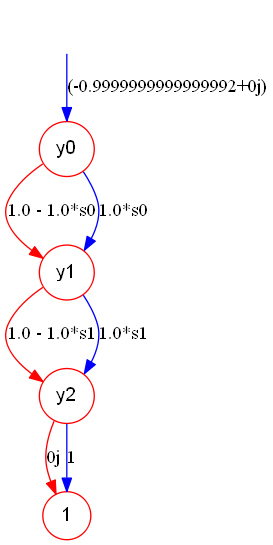

In [15]:
def veri_grover(n=2,r=1):
    U=toffoli(n)
    U=reshape2(U)
    U2=toffoli(n-1)
    U2=reshape2(U2)    
    syms=[]
    syms2=[]
    for k in range(n):
        syms.append(symbols('s'+str(k)))
        syms.append(symbols('sn'+str(k)))
        syms2.append('s'+str(k))
    
    H=1/np.sqrt(2)*np.array([[1,1],[1,-1]])
    X=np.array([[0,1],[1,0]])
#     CX=np.array([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]])
#     CX=reshape2(CX)
    
    tn=TensorNetwork([])

    #add initial
    k0=np.array([1,0])
    for k in range(n):
        var=[Index('x'+str(k))]
        ts=Tensor(k0,var)
        tn.tensors.append(ts)
        
    k1=np.array([0,1])    
    var=[Index('x'+str(n))]
    ts=Tensor(k1,var)
    tn.tensors.append(ts)
    
    #add H gate
    for k in range(n+1):
        var=[Index('x'+str(k)),Index('x'+str(k)+'_1')]
        ts=Tensor(H,var)
        tn.tensors.append(ts)
    
    
    for m in range(r):
        
        #add X^s gate
        for k in range(n):
            var=[Index('x'+str(k)+'_'+str(8*m+1)),Index('x'+str(k)+'_'+str(8*m+2))]
            Xs=np.array([[syms[2*k],syms[2*k+1]],[syms[2*k+1],syms[2*k]]])
#             Xs=np.array([[1,0],[0,1]])
            ts=Tensor(Xs,var)
            tn.tensors.append(ts)
        
        #add toffoli gate
        var=[]
        for k in range(n):
            var.append(Index('x'+str(k)+'_'+str(8*m+2)))
            var.append(Index('x'+str(k)+'_'+str(8*m+3)))
        var.append(Index('x'+str(n)+'_'+str(m+1)))
        var.append(Index('x'+str(n)+'_'+str(m+2)))
        ts=Tensor(U,var)
        tn.tensors.append(ts)
    
        #add X^s gate
        for k in range(n):
            var=[Index('x'+str(k)+'_'+str(8*m+3)),Index('x'+str(k)+'_'+str(8*m+4))]
            Xs=np.array([[syms[2*k],syms[2*k+1]],[syms[2*k+1],syms[2*k]]])
#             Xs=np.array([[1,0],[0,1]])
            ts=Tensor(Xs,var)
            tn.tensors.append(ts)
        
        #add H gate
        for k in range(n):
            var=[Index('x'+str(k)+'_'+str(8*m+4)),Index('x'+str(k)+'_'+str(8*m+5))]
            ts=Tensor(H,var)
            tn.tensors.append(ts)
        
        #add X gate
        for k in range(n-1):
            var=[Index('x'+str(k)+'_'+str(8*m+5)),Index('x'+str(k)+'_'+str(8*m+6))]
            ts=Tensor(X,var)
            tn.tensors.append(ts)        
    
        #add HX
        H1=1/np.sqrt(2)*np.array([[1,1],[-1,1]])
        H2=1/np.sqrt(2)*np.array([[1,-1],[1,1]])
        var=[Index('x'+str(n-1)+'_'+str(8*m+5)),Index('x'+str(n-1)+'_'+str(8*m+6))]
        ts=Tensor(H2,var)
        tn.tensors.append(ts)    
#     var=[Index('x'+str(n-1)+'_5'),Index('x'+str(n-1)+'_13')]
#     ts=Tensor(X,var)
#     tn.tensors.append(ts)
#     var=[Index('x'+str(n-1)+'_13'),Index('x'+str(n-1)+'_6')]
#     ts=Tensor(H,var)
#     tn.tensors.append(ts)    

        #add Toffoli    
        var=[]
        for k in range(n):
            var.append(Index('x'+str(k)+'_'+str(8*m+6)))
            var.append(Index('x'+str(k)+'_'+str(8*m+7)))
        ts=Tensor(U2,var)
        tn.tensors.append(ts)
    
        #add X gate
        for k in range(n-1):
            var=[Index('x'+str(k)+'_'+str(8*m+7)),Index('x'+str(k)+'_'+str(8*m+8))]
            ts=Tensor(X,var)
            tn.tensors.append(ts)
        
        #add XH
#         H2=1/np.sqrt(2)*np.array([[1,-1],[1,1]])
        var=[Index('x'+str(n-1)+'_'+str(8*m+7)),Index('x'+str(n-1)+'_'+str(8*m+8))]
        ts=Tensor(H1,var)
        tn.tensors.append(ts)
#     var=[Index('x'+str(n-1)+'_7'),Index('x'+str(n-1)+'_14')]
#     ts=Tensor(H,var)
#     tn.tensors.append(ts)
#     var=[Index('x'+str(n-1)+'_14'),Index('x'+str(n-1)+'_8')]
#     ts=Tensor(X,var)
#     tn.tensors.append(ts)    
    
        #add H gate
        for k in range(n):
            if m==r-1:
                var=[Index('x'+str(k)+'_'+str(8*m+8)),Index('y'+str(k))]
            else:
                var=[Index('x'+str(k)+'_'+str(8*m+8)),Index('x'+str(k)+'_'+str(8*m+9))]
            ts=Tensor(H,var)
            tn.tensors.append(ts)
        
    var=[Index('x'+str(n)+'_'+str(r+1)),Index('y'+str(n))]
    ts=Tensor(H,var)
    tn.tensors.append(ts)
    
    var=[]
    for k in range(n+1):
        var.append('x'+str(k))
        for k1 in range(8*r+2):
            var.append('x'+str(k)+'_'+str(k1))
        var.append('y'+str(k))
    syms2.reverse()
#     print(syms2)
    Ini_TDD(var,syms2)

    
    tdd=tn.cont()
    print(gu1())
    print(gu2())
    return tdd

tdd=veri_grover(2,1)
tdd.show()

60
16


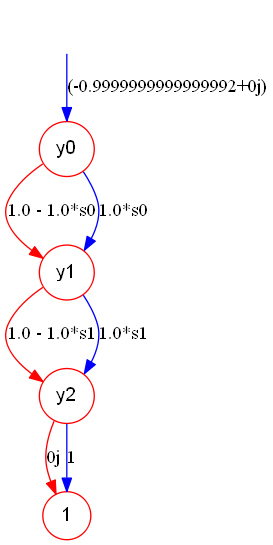

In [16]:
# grover
n=2
U=toffoli(n)
U=reshape2(U)
s0=symbols('s0')
s1=symbols('s1')
sn0=symbols('sn0')
sn1=symbols('sn1')
X0=np.array([[s0,sn0],[sn0,s0]])
X1=np.array([[s1,sn1],[sn1,s1]])
H=1/np.sqrt(2)*np.array([[1,1],[1,-1]])
X=np.array([[0,1],[1,0]])
CX=np.array([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]])
CX=reshape2(CX)

tn=TensorNetwork([])

#add initial
k0=np.array([1,0])
for k in range(n):
    var=[Index('x'+str(k))]
    ts=Tensor(k0,var)
    tn.tensors.append(ts)
    
k1=np.array([0,1])    
var=[Index('x'+str(n))]
ts=Tensor(k1,var)
tn.tensors.append(ts)

#add H gate
for k in range(n+1):
    var=[Index('x'+str(k)),Index('x'+str(k)+'_1')]
    ts=Tensor(H,var)
    tn.tensors.append(ts)

#add X^s gate

var=[Index('x0_1'),Index('x0_2')]
ts=Tensor(X0,var)
tn.tensors.append(ts)
var=[Index('x1_1'),Index('x1_2')]
ts=Tensor(X1,var)
tn.tensors.append(ts)

#add toffoli gate
var=[]
for k in range(n):
    var.append(Index('x'+str(k)+'_2'))
    var.append(Index('x'+str(k)+'_3'))
var.append(Index('x'+str(n)+'_1'))
var.append(Index('x'+str(n)+'_2'))
ts=Tensor(U,var)
tn.tensors.append(ts)

#add X^s gate
var=[Index('x0_3'),Index('x0_4')]
ts=Tensor(X0,var)
tn.tensors.append(ts)
var=[Index('x1_3'),Index('x1_4')]
ts=Tensor(X1,var)
tn.tensors.append(ts)


#add H gate
for k in range(n):
    var=[Index('x'+str(k)+'_4'),Index('x'+str(k)+'_5')]
    ts=Tensor(H,var)
    tn.tensors.append(ts)

#add X gate
for k in range(n):
    var=[Index('x'+str(k)+'_5'),Index('x'+str(k)+'_6')]
    ts=Tensor(X,var)
    tn.tensors.append(ts)
    
var=[Index('x1_6'),Index('x1_7')]
ts=Tensor(H,var)
tn.tensors.append(ts)    
    
var=[Index('x0_6'),Index('x0_7'),Index('x1_7'),Index('x1_8')]
ts=Tensor(CX,var)
tn.tensors.append(ts)  

var=[Index('x1_8'),Index('x1_9')]
ts=Tensor(H,var)
tn.tensors.append(ts) 
    
var=[Index('x0_7'),Index('x0_8')]
ts=Tensor(X,var)
tn.tensors.append(ts)     

var=[Index('x1_9'),Index('x1_10')]
ts=Tensor(X,var)
tn.tensors.append(ts)

var=[Index('x0_8'),Index('y0')]
ts=Tensor(H,var)
tn.tensors.append(ts) 

var=[Index('x1_10'),Index('y1')]
ts=Tensor(H,var)
tn.tensors.append(ts) 

var=[Index('x2_2'),Index('y2')]
ts=Tensor(H,var)
tn.tensors.append(ts) 

var=[]
for k in range(n+1):
    var.append('x'+str(k))
    for k1 in range(11):
        var.append('x'+str(k)+'_'+str(k1))
    var.append('y'+str(k))
    
Ini_TDD(var,['s1','s0'])
    
tdd=tn.cont()
print(gu1())
print(gu2())
tdd.show()

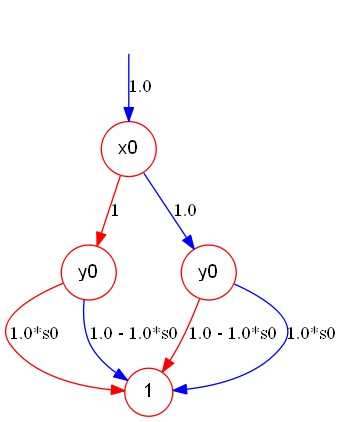

In [17]:
Ini_TDD(['x0','y0','x1','y1'],['s0'])
A=['x0','y0','x1','y1','xn0','xn1']
[s0,sn0]=symbols(['s0','sn0'])
X=np.array([[s0,sn0],[sn0,s0]])
var2=[Index('x0'),Index('y0')]
ts2=Tensor(X,var2)
# ts2.tdd().show()
tdd=ts2.tdd()
tdd.show()
# ts2=Tensor(U,var)

0.06499099731445312
2


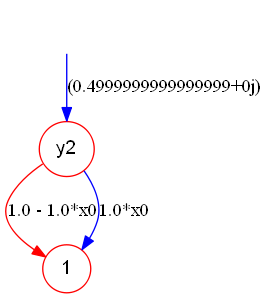

In [18]:
path='Benchmarks/'
n=3
t_start=time.time()
file_name='teleportation.qasm'
cir=QuantumCircuit.from_qasm_file(path+file_name)
tn,indices=cir_2_tn(cir)

x_k='x'+str(2)
U=np.array([1,0])
temp_ts=Tensor(U,[Index(x_k)])
tn.tensors.insert(0,temp_ts)
if not x_k in indices:
    indices.insert(0,x_k)
x_k='x'+str(1)
temp_ts=Tensor(U,[Index(x_k)])
tn.tensors.insert(0,temp_ts)
if not x_k in indices:
    indices.insert(0,x_k)
x_k='x'+str(0)
xn_k='xn'+str(0)
s=Symbol(x_k)
ns=Symbol(xn_k)
U=np.array([ns,s])
temp_ts=Tensor(U,[Index(x_k)])
tn.tensors.insert(0,temp_ts)
if not x_k in indices:
    indices.insert(0,x_k)
    
Ini_TDD(indices)
tdd=tn.cont()
print(time.time()-t_start)
print(tdd.node_number())
# print(gu1())
# print(gu2())
tdd.show()

25
6


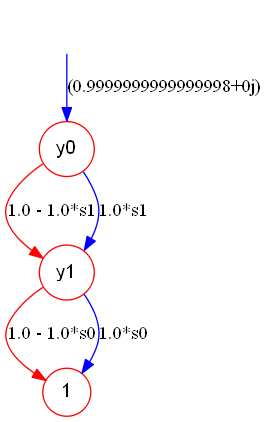

In [19]:
#superdense coding
n=2
s0=symbols('s0')
s1=symbols('s1')
sn0=symbols('sn0')
sn1=symbols('sn1')
X0=np.array([[sn0,s0],[s0,sn0]])
Z0=np.array([[1,0],[0,sn1-s1]])
H=1/np.sqrt(2)*np.array([[1,1],[1,-1]])
CX=np.array([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]])
CX=reshape2(CX)

tn=TensorNetwork([])

#add initial
k0=np.array([1,0])
for k in range(n):
    var=[Index('x'+str(k))]
    ts=Tensor(k0,var)
    tn.tensors.append(ts)
    
#add H gate
var=[Index('x'+str(0)),Index('x'+str(0)+'_1')]
ts=Tensor(H,var)
tn.tensors.append(ts)


# add CX gate
var=[Index('x0_1'),Index('x0_2'),Index('x1'),Index('x1_0')]
ts=Tensor(CX,var)
tn.tensors.append(ts)  

#add X^s gate
var=[Index('x0_2'),Index('x0_3')]
ts=Tensor(X0,var)
tn.tensors.append(ts)

#add Z^s gate
var=[Index('x0_3'),Index('x0_4')]
ts=Tensor(Z0,var)
tn.tensors.append(ts)


# add CX gate
var=[Index('x0_4'),Index('x0_5'),Index('x1_0'),Index('y1')]
ts=Tensor(CX,var)
tn.tensors.append(ts) 


#add H gate
var=[Index('x'+str(0)+'_5'),Index('y0')]
ts=Tensor(H,var)
tn.tensors.append(ts)
    

var=[]
for k in range(n):
    var.append('x'+str(k))
    for k1 in range(7):
        var.append('x'+str(k)+'_'+str(k1))
    var.append('y'+str(k))
    
Ini_TDD(var,['s1','s0'])
    
tdd=tn.cont()
print(gu1())
print(gu2())
tdd.show()

In [20]:
def toffoli_decom(n):
#     qr = QuantumRegister(2*n-1)
    qc=QuantumCircuit(2*n-1)
#     qr=qc.qregs[0]
    qc.ccx(0,1,n)
#     qc.barrier(qr)
    for q in range(2,n):
        qc.ccx(q,q+n-2,q+n-1)
#         qc.barrier(qr)
    for q in range(n-2,1,-1):
        qc.ccx(q,q+n-2,q+n-1)
#         qc.barrier(qr)
    if n>2:
        qc.ccx(0,1,n)        
    return qc

n=4
cir=toffoli_decom(n)
cir.draw()

q_0: ──■───────────────────■──
       │                   │  
q_1: ──■───────────────────■──
       │                   │  
q_2: ──┼────■─────────■────┼──
       │    │         │    │  
q_3: ──┼────┼────■────┼────┼──
     ┌─┴─┐  │    │    │  ┌─┴─┐
q_4: ┤ X ├──■────┼────■──┤ X ├
     └───┘┌─┴─┐  │  ┌─┴─┐└───┘
q_5: ─────┤ X ├──■──┤ X ├─────
          └───┘┌─┴─┐└───┘     
q_6: ──────────┤ X ├──────────
               └───┘

0.043942928314208984
18


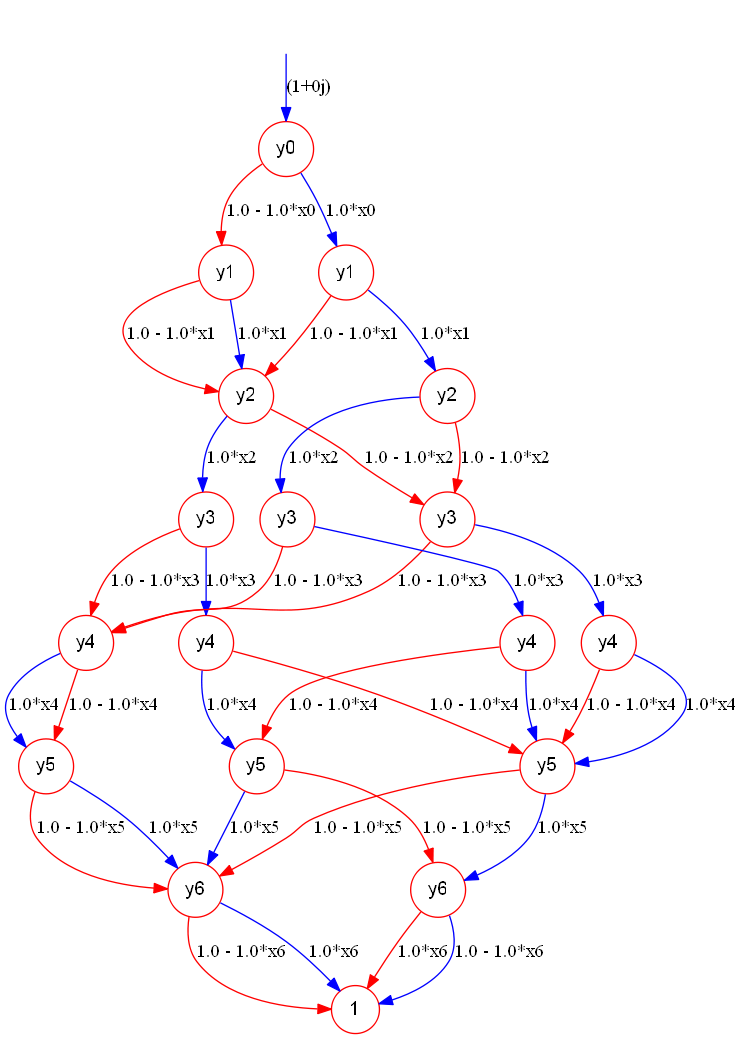

In [21]:
t_start=time.time()
tn,indices=cir_2_tn(cir)
for k in range(2*n-1):
    x_k='x'+str(k)
    xn_k='xn'+str(k)
    s=Symbol(x_k)
    ns=Symbol(xn_k)
    U=np.array([ns,s])
#     U=np.array([0,1])
    temp_ts=Tensor(U,[Index(x_k)])
    tn.tensors.insert(0,temp_ts)
    if not x_k in indices:
        indices.append(x_k)
# indices.reverse()
Ini_TDD(indices,n=300)
tdd=tn.cont()
print(time.time()-t_start)
print(tdd.node_number())
# print(gu1())
# print(gu2())
tdd.show()

693


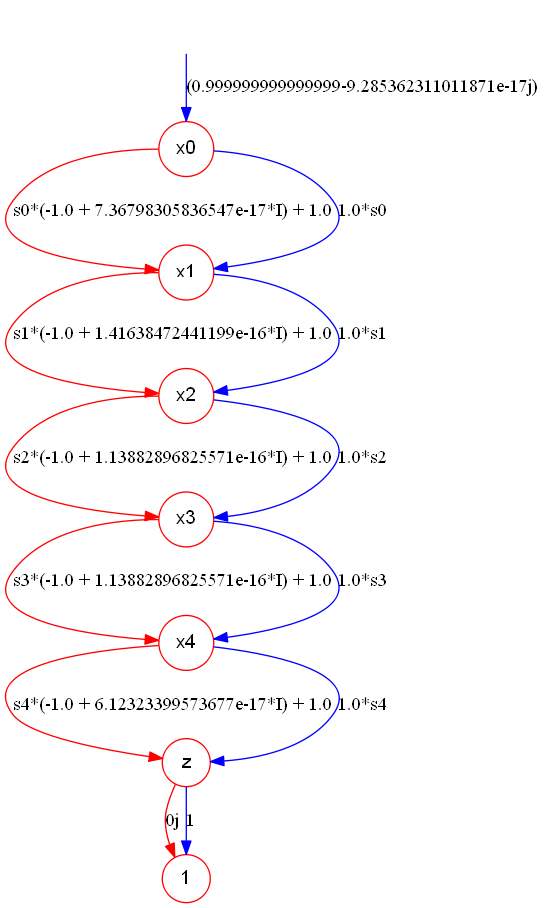

In [26]:
def veri_pe(n=2):
    path='Benchmarks/'
    file_name='iqft_'+str(n)+'.qasm'
    cir=QuantumCircuit.from_qasm_file(path+file_name)
    tn,indices=cir_2_tn(cir)

    syms=[]
    syms2=[]
    for k in range(n):
        syms.append(symbols('s'+str(k)))
        syms.append(symbols('sn'+str(k)))
        syms2.append('s'+str(k))
    
    for k in range(n):
        f=1
        for t in range(k,n):
            f=f*(syms[2*t+1]+np.exp(1j*np.pi/(2**(t-k)))*syms[2*t])
        U=np.zeros((2,2,2,2))*I*0
        U[0][0]=np.eye(2)
        U[1][1]=np.array([[1,0],[0,f]])
        temp_ts=Tensor(U,[Index('y'+str(k),0),Index('y'+str(k),1),Index('z',k),Index('z',k+1)])
        tn.tensors.append(temp_ts)
        H=1/np.sqrt(2)*np.array([[1,1],[1,-1]])
        temp_ts=Tensor(H,[Index('y'+str(k),1),Index('yt'+str(k),0)])
        tn.tensors.append(temp_ts)
        ini=np.array([1,0])
        temp_ts=Tensor(ini,[Index('yt'+str(k),0)])
        tn.tensors.append(temp_ts)
        indices.append('yt'+str(k))
    ini=np.array([0,1])
    temp_ts=Tensor(ini,[Index('z',0)])
    tn.tensors.append(temp_ts)
    
    indices.append('z')
    syms2.reverse()
    Clear_TDD()
    Ini_TDD(indices,syms2)
    tdd=tn.cont(optimizer='tree_decomposition')
#     print(gu1())
#     print(gu2())
    print(gu1()+gu2())
    return tdd
tdd=veri_pe(n=5)
tdd.show()